# Boston House Price Prediction

Problem is to predict the price of houses from Boston. We will build various Machine learning models, from that we will select model which performs best. We are going to use dataset provided by sklearn library.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Import Data

In [3]:
#Storing boston house data 
bos_data = load_boston()

#### Understanding Data
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [4]:
#creating dataframe
bos_df = pd.DataFrame(data = bos_data.data)

print("Shape of data before adding target : ", bos_df.shape)

Shape of data before adding target :  (506, 13)


In [5]:
#adding feature names
bos_df.columns = bos_data.feature_names

#adding price fetaure from target
bos_df['PRICE'] = bos_data.target

print("Shape of data adding adding target : ", bos_df.shape)

Shape of data adding adding target :  (506, 14)


In [6]:
#export data
bos_df.to_csv('Boston_House_Prices.csv', index= False)

### Data Cleaning and preparation

In [7]:
#check for null values across column if any column has null values for all rows
bos_df.isnull().all(axis=0).value_counts()

False    14
dtype: int64

In [8]:
#check for null values across rows if any row has null values for all columns
bos_df.isnull().all(axis=1).value_counts()

False    506
dtype: int64

In [9]:
#check for null values across rows if any row has null values for any column
bos_df.isnull().any(axis=1).value_counts()

False    506
dtype: int64

In [10]:
#check for null values across column if any column has null values for any row
bos_df.isnull().any(axis=0).value_counts()

False    14
dtype: int64

In [11]:
#checking data types of features
bos_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [12]:
#checking statistical summary
bos_df.describe(include="all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Exploratory Data Analysis

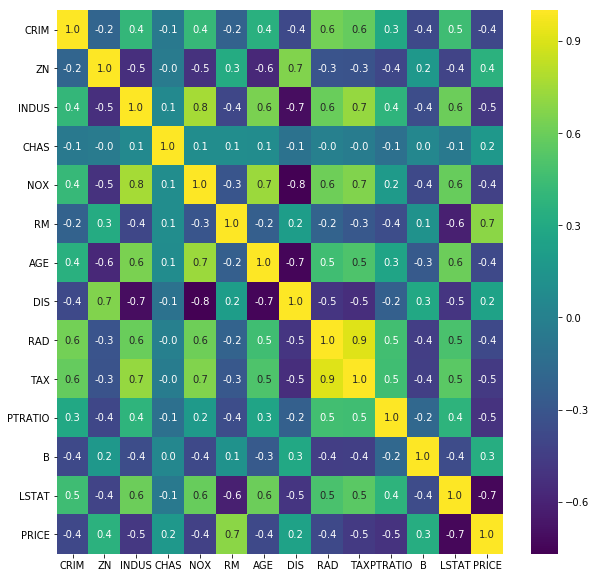

In [13]:
#check correaltion with heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data=bos_df.corr(), annot=True, cmap='viridis', fmt='.1f')

C:\Users\ABC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ABC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


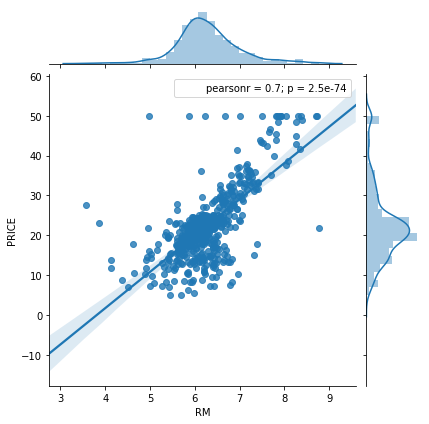

In [14]:
#checking RM using joint plot
sns.jointplot('RM', 'PRICE', data=bos_df, kind='reg')

C:\Users\ABC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ABC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


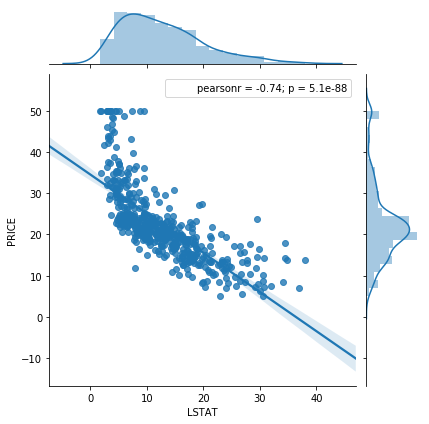

In [15]:
#checking LSTAT using joint plot
sns.jointplot('LSTAT', 'PRICE', data=bos_df, kind='reg')

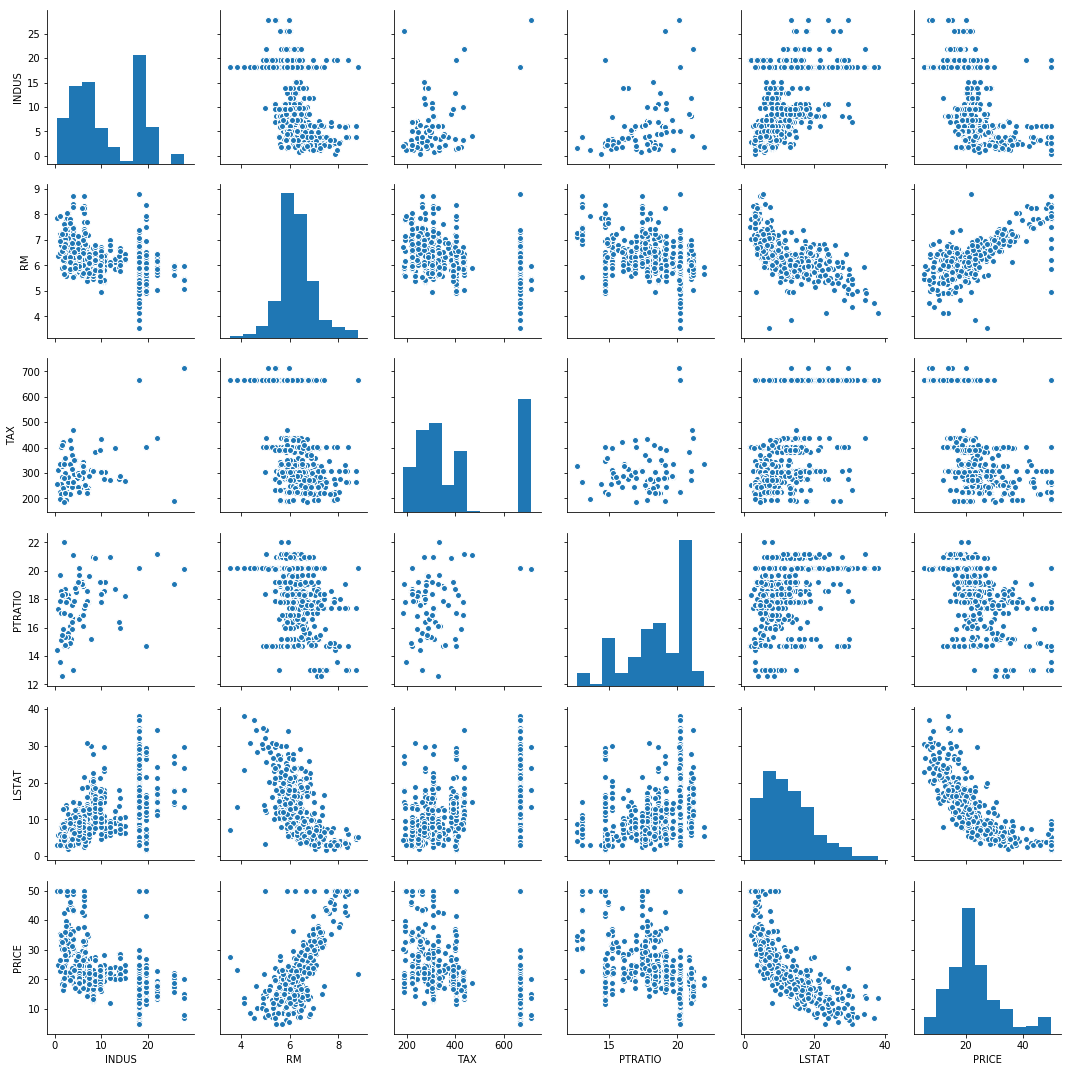

In [16]:
#checking relationships between variables
A = ['INDUS','RM','TAX','PTRATIO','LSTAT','PRICE']
sns.pairplot(bos_df[A])

### Model building and Evaluation

In [17]:
# Taking input features and target
X = bos_df[['INDUS','RM','TAX','PTRATIO','LSTAT']]
Y = bos_df[['PRICE']]

In [18]:
X = StandardScaler().fit_transform(X)
Y = StandardScaler().fit_transform(Y)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [21]:
many_models = {}

many_models["Linear Regression"]        = {}
many_models["KNN Regressor"]           = {}
many_models["DecisionTree Regressor"]  = {}
many_models["SVR"]           = {}
many_models["XGBoost Regressor"]       = {}
many_models["RandomForest Regressor"]  = {}


many_models["Linear Regression"]["model"]        = LinearRegression()
many_models["KNN Regressor"]["model"]           = KNeighborsRegressor()
many_models["DecisionTree Regressor"]["model"]  = DecisionTreeRegressor()
many_models["SVR"]["model"]           = SVR()
many_models["XGBoost Regressor"]["model"]       = XGBRegressor(objective='reg:squarederror')
many_models["RandomForest Regressor"]["model"]  = RandomForestRegressor()

many_models

{'Linear Regression': {'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)},
 'KNN Regressor': {'model': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform')},
 'DecisionTree Regressor': {'model': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best')},
 'SVR': {'model': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)},
 'XGBoost Regressor': {'model': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=1, gamma=0,
        

In [22]:
for k1, v1 in many_models.items():
    for k2,v2 in v1.items():
          print(v2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objectiv

In [23]:
for i in list(many_models):
    print(i)

Linear Regression
KNN Regressor
DecisionTree Regressor
SVR
XGBoost Regressor
RandomForest Regressor


In [24]:

for model,eval_parm in many_models.items():
    for metric in list(eval_parm.values()):
        #training mean square error
        model_obj = metric
        result = cross_val_score(model_obj, x_train, y_train.ravel(), cv=4, scoring='neg_mean_squared_error')
        many_models[model]["Training_MSE"] = round(result.mean(),3)
        #testing mean square error
        result = cross_val_score(model_obj, x_test, y_test.ravel(), cv=4, scoring='neg_mean_squared_error')
        many_models[model]["Testing_MSE"] = round(result.mean(),3)
        #training r2_score
        result = cross_val_score(model_obj, x_train,y_train.ravel(),cv=4, scoring='r2')
        many_models[model]["Training_r2"] = round(result.mean(),3)
        #testing r2_Score
        result = cross_val_score(model_obj, x_test,y_test.ravel(),cv=4, scoring='r2')
        many_models[model]["Testing_r2"] = round(result.mean(),3)
        
        


In [25]:
many_models

{'Linear Regression': {'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  'Training_MSE': -0.338,
  'Testing_MSE': -0.291,
  'Training_r2': 0.631,
  'Testing_r2': 0.744},
 'KNN Regressor': {'model': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'),
  'Training_MSE': -0.235,
  'Testing_MSE': -0.245,
  'Training_r2': 0.744,
  'Testing_r2': 0.778},
 'DecisionTree Regressor': {'model': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
  'Training_MSE': -0.323,
  'Testing_MSE': -0.235,
  'Training_r2': 0.65,
  'Testing_r2': 0.771},
 'SVR': {'model': SVR(C=1.0, cache_size=2

In [26]:
# model evaluation
pd.DataFrame(many_models) 

,Linear Regression,KNN Regressor,DecisionTree Regressor,SVR,XGBoost Regressor,RandomForest Regressor
Testing_MSE,-0.291,-0.245,-0.235,-0.216,-0.213,-0.189
Testing_r2,0.744,0.778,0.771,0.806,0.816,0.865
Training_MSE,-0.338,-0.235,-0.323,-0.202,-0.197,-0.216
Training_r2,0.631,0.744,0.65,0.781,0.785,0.786
model,"LinearRegression(copy_X=True, fit_intercept=Tr...","KNeighborsRegressor(algorithm='auto', leaf_siz...","DecisionTreeRegressor(criterion='mse', max_dep...","SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...","XGBRegressor(base_score=0.5, booster='gbtree',...","RandomForestRegressor(bootstrap=True, criterio..."


In [27]:
model = RandomForestRegressor()
model.fit(x_train, y_train.ravel())
y_test_pred = model.predict(x_test)

In [28]:
mean_squared_error(y_test,y_test_pred)

0.14553561435191967

In [29]:
r2_score(y_test,y_test_pred)

0.875971721273891

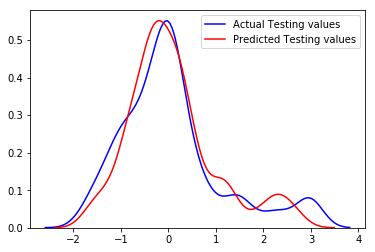

In [30]:
# distribution plot of prediction of testing datasets
axs = sns.distplot(y_test, hist=False, color='b', label="Actual Testing values")
sns.distplot(y_test_pred, hist=False, color='r', label="Predicted Testing values", ax=axs)

### Conclusion
In above graph, we can observe the distributuion of actual values of test data and predicted values of data.
We have got MSE as 0.15 and r2 score as 0.87 using random forest regressor for prediction of boston house prices.